In [1]:
import pandas as pd 
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)
%matplotlib inline
from multiprocessing import Pool
# from profilestats import profile
from scipy.stats import binned_statistic
from funcs.analysis.analysis import *

In [2]:
# obj = 'calibStars'
# ID  = 'uid_s'
obj = 'qsos'
ID = 'uid'
band = 'r'

In [3]:
def reader(n_subarray):
    return pd.read_csv(wdir+'data/merged/{}/{}_band/lc_{}.csv'.format(obj,band,n_subarray), comment='#', nrows=None, index_col = ID, dtype = {'catalogue': np.uint8, 'mag_ps': np.float32, 'magerr': np.float32, 'mjd': np.float64, ID: np.uint32})




In [4]:
# band = 'r'
dr = analysis(ID, obj)

In [5]:
dr.read_in(reader, redshift=True)
# dr.group(keys = ['uid'],read_in=True)

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [78]:
dr.df

,catalogue,mjd,mag,magerr,redshift,mjd_rf
uid,,,,,,
1,5,54741.371761,22.071905,0.115390,2.309,16543.176718
1,7,55806.596706,21.584365,0.126307,2.309,16865.094199
1,7,56247.322720,21.763349,0.124287,2.309,16998.284291
1,11,58292.479294,21.206030,0.173635,2.309,17616.343093
1,11,58313.420544,21.208019,0.173756,2.309,17622.671666
...,...,...,...,...,...,...
526356,11,58464.266007,20.563707,0.139099,2.375,17322.745484
526356,11,58636.423935,20.454365,0.130105,2.375,17373.755240
526356,11,58641.476701,20.485062,0.132971,2.375,17375.252356


In [7]:
dr.band = band

In [8]:
dr.group(keys = ['uid'],read_in=True)

In [ ]:
dr.df_grouped

In [ ]:
# What does this do
# dr.df = dr.df[dr.df.index.duplicated(keep=False)]

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
dr.df_grouped[['mjd_ptp_rf','mjd_ptp']].hist(bins=200, ax=ax)
print('max ∆t for observer frame: {:.2f}'.format(dr.df_grouped['mjd_ptp'].max()))
print('max ∆t for rest     frame: {:.2f}'.format(dr.df_grouped['mjd_ptp_rf'].max()))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
dr.df_grouped['mag_count'].hist(bins=350, ax=ax)
ax.set(xlim=[0,1000], xlabel='number of observations for given quasar')

In [ ]:
# dr.df_grouped.to_csv('/disk1/hrb/python/data/merged/meta_data/df_gb_uid_r.csv')

In [ ]:
'{:,}'.format(int((count*(count-1)/2).sum()))

In [ ]:
dr.df['catalogue'].unique()

In [21]:
dr.merge_with_catalogue(catalogue = 'dr12_vac', remove_outliers=False, prop_range_any={'MBH_CIV':(0,100)})

Int64Index([     1,      3,      4,      6,      7,      8,     12,     14,
                15,     16,
            ...
            526336, 526339, 526341, 526343, 526344, 526348, 526350, 526352,
            526353, 526356],
           dtype='int64', name='uid', length=296868)
Number of qsos with lightcurve: 295,339
Number of datapoints in:
SDSS: 702,998
PS: 1,673,362
ZTF: 9,719,270


### L-z plot
---

<AxesSubplot:>

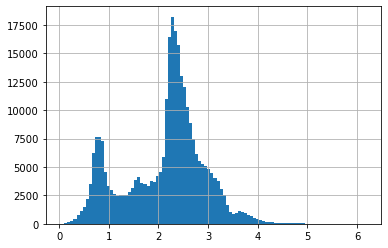

In [25]:
dr.properties['redshift'].hist(bins=100)

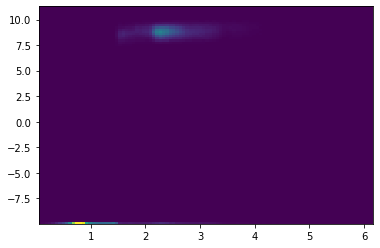

In [44]:
x, y = dr.properties[['redshift','MBH_CIV']].values.T
plt.hist2d(x,y, bins=100);

[Text(0.5, 0, 'Redshift'), Text(0, 0.5, 'Number of Quasars')]

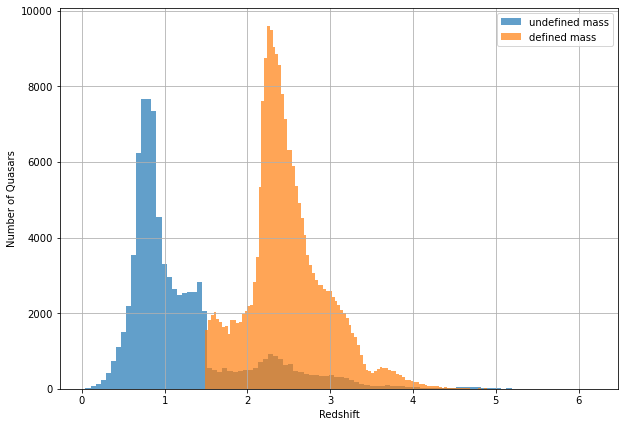

In [52]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
dr.properties.loc[dr.properties['MBH_CIV']==-9.999,'redshift'].hist(bins=100, alpha=0.7, ax=ax, label='undefined mass')
dr.properties.loc[dr.properties['MBH_CIV']!=-9.999,'redshift'].hist(bins=100, alpha=0.7, ax=ax, label='defined mass')
ax.legend()
ax.set(xlabel='Redshift', ylabel='Number of Quasars')

<AxesSubplot:>

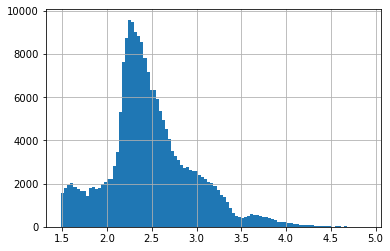

In [24]:
dr.properties['redshift'].hist(bins=100)

In [98]:
import seaborn as sns
def sns_correlate(self, band, vmin, vmax, save=False):
    from matplotlib.colors import LogNorm
    xname = 'redshift'
    yname = 'Lbol'
    
    data = self.properties[[xname,yname]]
    
#     xbounds, ybounds = dr.properties[[xname,yname]].quantile(q=[0.001,0.999]).values.T
    xbounds, ybounds = (1,4), (45,48)
    bounds={xname:xbounds, yname:ybounds}
    g = sns.JointGrid(x=xname, y=yname, data=data, xlim=bounds[xname], ylim=bounds[yname], height=9)
    g = g.plot_joint(plt.hexbin, norm=LogNorm(vmin=vmin, vmax=vmax), cmap='jet')
    g.ax_marg_x.hist(data[xname], bins=300)
    g.ax_marg_y.hist(data[yname], bins=300, orientation='horizontal', density = True)
#     g.ax_marg_y.hist(data[yname], bins=200, orientation='horizontal', cumulative=True, alpha=0.2, color='k')#, yticks=[1e-3, 1e-1, 1])
    # Could show 95, 99, 99.9% intervals on magerr histplot? Will need to do np.stats.quantile and ax.axvline
#     q = [0.85,0.95,0.99]
#     quantiles = zip(np.quantile(data[yname],q),q)
#     for q_val,q in quantiles:
#         g.ax_marg_y.axhline(y=q_val, lw=2, ls='--', color='k')
#         g.ax_marg_y.text(y=q_val+0.003,x=0.8, s=f'{q*100:.0f}%: {q_val:.2f}', fontdict={'size':12}, horizontalalignment='center')
#     g.ax_marg_y.set(xscale='log')

    plt.suptitle(self.obj + ' ' + band, x=0.1, y=0.95)
    if save:
        g.savefig('{}/plots/mag_magerr_{}_{}.pdf'.format(self.obj, band))

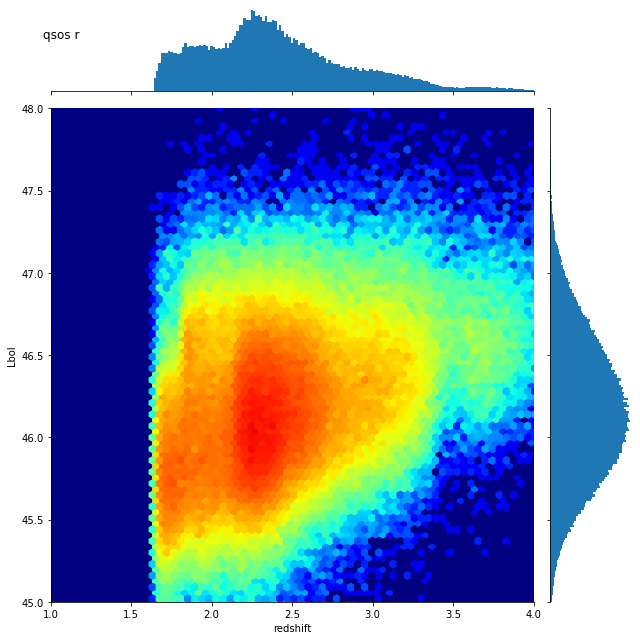

In [99]:
sns_correlate(dr, band, 1e0, 1e3, save=Falsez

---

In [ ]:
plt.hist(dr.properties['MBH_CIV'], bins=100)
len(dr.properties)

In [ ]:
dr.merge_with_catalogue(catalogue = 'dr14_vac', remove_outliers=True, prop_range_any={'MBH_CIV':(6,12)})

In [ ]:
plt.hist(dr.properties['MBH_CIV'], bins=100)
len(dr.properties)

In [ ]:
# dr.merge_with_catalogue(catalogue = 'dr12', remove_outliers=True, prop_range_any={'MBH_CIV':(5,13)})

In [ ]:
# grouped = pd.read_csv('/disk1/hrb/python/data/surveys/ztf/meta_data/ztfdr2_gb_uid_{}.csv'.format('r'),index_col = 0)
# test = grouped.join(df_z, on = 'uid', how = 'left')
# test.to_csv('/disk1/hrb/python/data/surveys/ztf/meta_data/ztfdr2_gb_uid_{}.csv'.format('r'))

In [ ]:
# #need to group by and apply this fn.
# def slope(group):
#     if len(group) > 1:
#         x = group['mjd']
#         y = group['mag']
#         return ((x-x.mean())*(y-y.mean())).sum()/((x-x.mean())**2).sum()
#     else:
#         return np.NaN

# slopes = dr.df.groupby('uid').apply(slope)
# slopes.name = 'slope'
# slopes_df = dr.df_grouped.join(slopes, how = 'inner', on='uid')

In [ ]:
# dr.plot_series(dr.df_grouped['slope'][dr.df_grouped['mag_count']>10].sort_values().head(10).index)

### Group uids by MBH distribution

In [ ]:
dr.properties[(dr.properties['Lbol'])

In [ ]:
key = 'Lbol' 
bounds, z_score, bounds_values, mean, std, ax = dr.bounds(key, bounds = np.array([-5,-1,-0.5,0,0.5,1,5]))

In [ ]:
test = dr.properties[(7 < dr.properties[key]) & (dr.properties[key] < 10.5)]

In [ ]:
n, bin_edges, _ = plt.hist(test[key], bins=68, range=(7.1,10.5), density=True)

In [ ]:
bin_edges

In [ ]:
np.savetxt('bin_edges_mbh_civ.csv',bin_edges, fmt='%.2f')

In [ ]:
np.savetxt('prob_mbh_civ.csv',n)

In [ ]:
def loc_uids(self, lower, upper):
    lower = int(lower)
    upper = int(upper)
    uids = self.df.index.unique()[:]
    boolean = ((lower<uids)&(uids<=upper))
    uids = uids[boolean]
    return uids

def savedtdm(sub_uids):
    df = pd.DataFrame(columns=['uid','dt','dm','cat'])
    print('computing: {} to {}\n'.format(min(sub_uids), max(sub_uids)))
    for batch in np.array_split(sub_uids,4):
        df_batch = dr.save_dtdm_rf(sub_uids)
        df = df.append(df_batch)
    print('saving:    {} to {}\n'.format(min(sub_uids), max(sub_uids)))
    df.to_csv('/disk1/hrb/python/analysis/qsos/computed/dtdm/raw/dtdm_raw_{}_{:06d}_to_{:06d}.csv'.format(dr.band,min(sub_uids),max(sub_uids)),index=False)

# if __name__ == '__main__': 
#     p = Pool(4)
#     p.map(savedtdm, np.array_split(loc_uids(dr, 0, 16e5),4))


In [ ]:
def calc_moments(bins,weights):
    k = np.array([3,4])
    x = bins*weights
    z = (x-x.mean(axis=1)[:,np.newaxis])/x.std(axis=1)[:,np.newaxis]
    return x.mean(axis=1), (z**4).mean(axis = 1) - 3
# 1st and second moment are unstandardised (else they would be 0,1 respectively). 3rd and 4th moments are standardised.

In [ ]:
dms_binned, dts_binned, t_bin_edges, t_bin_chunk, t_bin_chunk_centres, m_bin_edges, m_bin_centres, t_dict = dr.calc_dtdm(uids=None, n_bins_t = 1000, n_bins_m = 200, t_max=3020, t_spacing = 'log', m_spacing = 'log', read_in = 1, key = 'Lbol')

In [ ]:
import matplotlib
matplotlib.rc('font', **{'size': 13})
matplotlib.rc('text', usetex=False)

fig, ax, fig2, axes2, fig3, axes3 = dr.plot_sf_moments(key, bounds, ztf=False)
plt.figure(figsize=(15,8))
axes2[0].set(ylim=[-0.1,0.045])
axes2[1].set(ylim=[-0.7,0.5])

ax.set(xlabel = '∆t (days)')
# ax.set(ylim = [1e-1,5e-1])
axes2[1].legend(loc='upper center', 
             bbox_to_anchor=(1.1, 1.5),fancybox=False, shadow=False)
fig .savefig('/disk1/hrb/python/analysis/qsos/plots/dtdm/SF_{}.pdf'.format(key), bbox_inches='tight')
fig2.savefig('/disk1/hrb/python/analysis/qsos/plots/dtdm/mean_kurtosis_{}.pdf'.format(key), bbox_inches='tight')

In [ ]:
# Testing two SF definitions.
# Fits a gaussian to ∆m distribution and plots it as a function of ∆t
def gaussian(x,peak,offset):
    sigma = (2*np.pi)**-0.5*1/peak
    return peak*np.exp( -( (x-offset)**2/(2*sigma**2) ) )

from scipy.optimize import curve_fit
stds_fit = np.zeros(19)
stds     = np.zeros(19)
dms_binned_norm = np.zeros((19,200))
for i in range(19):
    m,_= np.histogram(m_bin_edges[:-1], m_bin_edges, weights = dms_binned[i], density=True);
    popt, _ = curve_fit(gaussian, m_bin_edges[:-1], m, p0 = [m.max(),m_bin_edges[:-1][m.argmax()]])
    stds[i] = (2*np.pi)**-0.5*1/popt[0]
    dms_binned_norm[i] = m
SF_1 = (((m_bin_centres**2)*dms_binned_norm).sum(axis=1)/dms_binned_norm.sum(axis=1))**0.5
SF_2 = (((m_bin_centres**2)*dms_binned).sum(axis=1)/dms_binned.sum(axis=1))**0.5

#Find the mathematical difference between the two definitions above

fig, ax = plt.subplots(1,1,figsize = (14,8))
ax.plot(t_bin_chunk_centres,SF_1, label = 'sf_1', lw = 0.5, marker = 'o')
ax.plot(t_bin_chunk_centres,SF_2, label = 'sf_2', lw = 0.5, marker = 'o')
# ax.scatter(t_bin_chunk_centres,stds, label = 'stds')
# ax.set(xscale='log',yscale='log',xticks = [0,1,2,3]);
ax.legend()

In [ ]:
########REST
dms_binned, dts_binned, t_bin_edges, t_bin_chunk, t_bin_chunk_centres, m_bin_edges, m_bin_centres, t_dict = dr.calc_dtdm(uids=None, n_bins_t = 1000, n_bins_m = 200, t_max=7600, t_spacing = 'log', m_spacing = 'log', read_in = 1, key = 'Lbol')
cmap = plt.cm.cool
skip = 1
if skip > 1:
    fig, axes = plt.subplots((19//skip + 1),1,figsize = (15,3*(19//skip + 1)))
else:
    fig, axes = plt.subplots(19,1,figsize = (15,3*19))

for i, ax in enumerate(axes):
    n=1
    m,_,_=ax.hist(m_bin_edges[:-1], m_bin_edges, weights = dms_binned[i], alpha = 1, density=True, label = t_dict[i], color = cmap(i/20.0));
    ax.legend()
    ax.axvline(x=0, lw = 1, color = 'k', ls = '-')
    ax.set(xlim = [-2,2])
    x = np.linspace(-2,2,1000)
#     ax.plot(x,gaussian(x,m.max(),m_bin_edges[:-1:n][m.argmax()]))
#     popt, _ = curve_fit(gaussian, m_bin_edges[:-1:n], m, p0 = [m.max(),m_bin_edges[:-1:n][m.argmax()]])
#     ax.plot(x,gaussian(x,popt[0],popt[1]), color = 'r')
#     ax[1].hist(t_bin_edges[:-1], t_bin_edges, weights = dts_binned[i], alpha = 1, label = t_dict[i], color = cmap(i/20.0));
#     ax[1].set(xlim = (t_bin_chunk[i],t_bin_chunk[i+1]))

In [ ]:
cmap = plt.cm.cool
skip = 1
if skip > 1:
    fig, axes = plt.subplots((19//skip + 1),1,figsize = (15,3*(19//skip + 1)))
else:
    fig, axes = plt.subplots(19,1,figsize = (15,3*19))

stds = np.zeros(19)
for i, ax in enumerate(axes):
#     if skip > 1:
#         i = range(19)[::skip][i]
#     if i < 10:
#         n=1
#     elif i < 15:
#         n=2
#     else:
#         n=3
    n=1
    m,_,_=ax.hist(m_bin_edges[:-1], m_bin_edges[::n], weights = dms_binned[i], alpha = 1, density=True, label = t_dict[i], color = cmap(i/20.0));
    ax.legend()
    ax.axvline(x=0, lw = 1, color = 'k', ls = '-')
    ax.set(xlim = [-2,2], xlabel = 'mag')
    x = np.linspace(-2,2,1000)
#     ax.plot(x,gaussian(x,m.max(),m_bin_edges[:-1:n][m.argmax()]))
    #Also make sure that bins returned from .hist match m_bin_edges : it is
    try:
        popt, _ = curve_fit(gaussian, m_bin_edges[:-1:n], m, p0 = [m.max(),m_bin_edges[:-1:n][m.argmax()]])
        ax.plot(x,gaussian(x,popt[0],popt[1]), color = 'r')
        stds[i] = (2*np.pi)**-0.5*1/popt[0]
    except:
        pass
#     ax[1].hist(t_bin_edges[:-1], t_bin_edges, weights = dts_binned[i], alpha = 1, label = t_dict[i], color = cmap(i/20.0));
#     ax[1].set(xlim = (t_bin_chunk[i],t_bin_chunk[i+1]), xlabel = 'mjd')
plt.subplots_adjust(hspace=0.3)
plt.savefig('/disk1/hrb/python/analysis/qsos/plots/dtdm/dtdm_stacked_{}.pdf'.format(key),bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(14,10))
for i in range(19)[::3]:
    ax.hist(m_bin_edges[:-1], m_bin_edges, weights = dms_binned[i], alpha = 0.3, density=True, label = t_dict[i], color = cmap(i/20.0));
    ax.legend()
    ax.axvline(x=0, lw = 0.1, color = 'k', ls = '-')
#     ax.set(yscale='log')